<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/med_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 23.14 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-16 06:39:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-16 06:39:18 (92.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [4]:
import os

filenames = [data_dir + "/"+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## Preprocess data

In [5]:
def get_lines(filename):
  """
  Reads filename and return the lines of text as a list

  Args:
  filename

  Returns:
  List of lines
  """

  with open(filename, "r") as f:
    return f.read().splitlines()

In [6]:
train_lines = get_lines(filenames[1])
train_lines[0:10]

['###24845963',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .',
 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .',
 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .',
 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .',
 "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .",
 'RESULTS\tWhen 

In [7]:
from inspect import currentframe
def preprocesses_line(filename):
  """
  Returns list of dictionaries
  """

  input_line = get_lines(filename)
  text = []
  category =[]
  line_nums = []
  max_lines =[]


  curr_max= 0

  for line in input_line:
    if not '###' in line:
      if line == "":
        for x in range(curr_max):
          max_lines.append(curr_max)
        continue
      else:
        curr_max += 1
        line_nums.append(line_number)
        line_number += 1
        split = line.split("\t")
        category.append(split[0])
        text.append(split[1])

    else:

      line_number =0
      curr_max = 0


  return {"line_number": line_nums, "text": text, "category": category, "max" :max_lines}

In [8]:
import pandas as pd
test_df = pd.DataFrame(preprocesses_line(filenames[0]))
txt_dict_train = preprocesses_line(filenames[1])
val_df = pd.DataFrame(preprocesses_line(filenames[2]))
train_df = pd.DataFrame(txt_dict_train)

<Axes: ylabel='Frequency'>

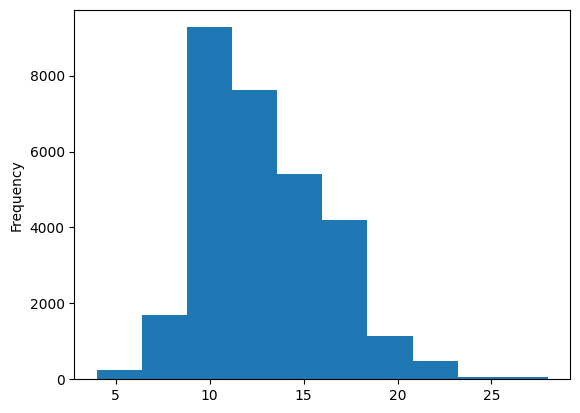

In [9]:
train_df['max'].plot.hist()

## Get list of sentences

In [10]:
train_sentences = train_df['text'].to_list()
val_sentences = val_df['text'].to_list()
test_sentences = test_df['text'].to_list()

## Encode Labels

In [11]:
import sklearn

encoder = sklearn.preprocessing.OneHotEncoder()

train_onelabels = encoder.fit_transform(train_df['category'].to_numpy().reshape(-1,1))
train_onelabels = train_onelabels.toarray()
test_onelabels = encoder.fit_transform(test_df['category'].to_numpy().reshape(-1,1))
test_onelabels = test_onelabels.toarray()
val_onelabels = encoder.fit_transform(val_df['category'].to_numpy().reshape(-1,1))
val_onelabels = val_onelabels.toarray()

In [12]:
label_encoder = sklearn.preprocessing.LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['category'])
test_labels = label_encoder.fit_transform(test_df['category'])
val_labels = label_encoder.fit_transform(val_df['category'])
train_labels, len(train_labels)


(array([0, 4, 4, ..., 4, 4, 1]), 30135)

In [13]:
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Model 0 baseline naive bayes

In [14]:
model_0 = sklearn.pipeline.Pipeline([
    ("tfid", sklearn.feature_extraction.text.TfidfVectorizer()),
    ("clf", sklearn.naive_bayes.MultinomialNB())
])

In [15]:
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [16]:
model_0.score(val_sentences, val_labels)

0.6779771161964008

In [17]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([2, 2, 4, 2, 2, 4, 4, 4, 4, 4])

In [18]:
from helper_functions import calculate_results,create_tensorboard_callback
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 67.79771161964008,
 'precision': 0.6775043255859432,
 'recall': 0.6779771161964008,
 'f1': 0.6371863234667444}

## Model 1 Conv1D

In [19]:
import tensorflow as tf

txt_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 6800,
                                                   output_sequence_length = 55)

txt_vectoriser.adapt(train_sentences)

In [20]:
txt_vectoriser.get_vocabulary()[:5]

['', '[UNK]', 'the', 'and', 'of']

In [21]:
embedding_layer = tf.keras.layers.Embedding(input_dim = txt_vectoriser.vocabulary_size(),
                                            output_dim = 128,
                                            embeddings_initializer = "uniform",
                                            mask_zero = True)

### Show embedding

In [22]:
embedding_layer(txt_vectoriser(["this is a test"]))

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.0385878 ,  0.01300656, -0.04075005, ...,  0.01808161,
         -0.03195025,  0.04111229],
        [-0.03084419,  0.03361272,  0.01465375, ..., -0.01506587,
         -0.04809178, -0.03273748],
        [ 0.00049154, -0.03184384,  0.00300831, ...,  0.01862815,
          0.03125353, -0.03653736],
        ...,
        [-0.03144471,  0.00058503, -0.04244459, ...,  0.00695503,
          0.03995914,  0.01491691],
        [-0.03144471,  0.00058503, -0.04244459, ...,  0.00695503,
          0.03995914,  0.01491691],
        [-0.03144471,  0.00058503, -0.04244459, ...,  0.00695503,
          0.03995914,  0.01491691]]], dtype=float32)>

### Creating datasets

* from tensor slices = from lists

In [23]:
train_dataset=  tf.data.Dataset.from_tensor_slices((train_sentences, train_onelabels))
train_dataset = train_dataset.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_onelabels))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_onelabels))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
inputs = tf.keras.layers.Input(shape = (1,), dtype = tf.string)
x = txt_vectoriser(inputs)
x = embedding_layer(x)
x = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = "relu")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(5, activation = "softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_conv1d")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [25]:
model_1.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [26]:
hist_1 = model_1.fit(train_dataset,
            epochs = 5,
            validation_data = val_dataset,
            callbacks = [create_tensorboard_callback("exp", "Conv1D")])

Saving TensorBoard log files to: exp/Conv1D/20250116-063940
Epoch 1/5
942/942 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.5709 - loss: 1.0465 - val_accuracy: 0.7360 - val_loss: 0.6876
Epoch 2/5


KeyboardInterrupt: 

In [ ]:
model_1.evaluate(test_dataset)

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_class = tf.argmax(model_1_pred_probs, axis = 1).numpy()

In [ ]:
calculate_results(y_true = val_labels,
                  y_pred = model_1_pred_class)

## Model 3 Use combination of token and character level embeddings

In [27]:
def split_chars(text):
  return " ".join(list(text))

In [28]:
split_chars("hello world")

'h e l l o   w o r l d'

In [29]:
train_chars = [split_chars(text) for text in train_sentences]
test_chars = [split_chars(text) for text in test_sentences]
val_chars = [split_chars(text) for text in val_sentences]
train_chars[:5]

['T h i s   s t u d y   a n a l y z e d   l i v e r   f u n c t i o n   a b n o r m a l i t i e s   i n   h e a r t   f a i l u r e   p a t i e n t s   a d m i t t e d   w i t h   s e v e r e   a c u t e   d e c o m p e n s a t e d   h e a r t   f a i l u r e   (   A D H F   )   .',
 'A   p o s t   h o c   a n a l y s i s   w a s   c o n d u c t e d   w i t h   t h e   u s e   o f   d a t a   f r o m   t h e   E v a l u a t i o n   S t u d y   o f   C o n g e s t i v e   H e a r t   F a i l u r e   a n d   P u l m o n a r y   A r t e r y   C a t h e t e r i z a t i o n   E f f e c t i v e n e s s   (   E S C A P E   )   .',
 'L i v e r   f u n c t i o n   t e s t s   (   L F T s   )   w e r e   m e a s u r e d   a t   @   t i m e   p o i n t s   f r o m   b a s e l i n e   ,   a t   d i s c h a r g e   ,   a n d   u p   t o   @   m o n t h s   f o l l o w - u p   .',
 'S u r v i v a l   a n a l y s e s   w e r e   u s e d   t o   a s s e s s   t h e   a s s o c i a t i o n   b e t w e 

In [30]:
char_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 60,
                                                    output_sequence_length = 290,
                                                    standardize =None)

In [31]:
char_vectoriser.adapt(train_chars)

In [ ]:
len(char_vectoriser.get_vocabulary())

In [32]:
embedding_layer_char = tf.keras.layers.Embedding(input_dim = 60,
                                                 output_dim = 25,
                                                 mask_zero = True)

In [ ]:
embedding_layer_char(char_vectoriser(["t h i s i s a t e s t"]))

In [ ]:
inputs= tf.keras.layers.Input(shape = (1,), dtype = tf.string)
x = char_vectoriser(inputs)
x = embedding_layer_char(x)
x = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = "relu")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(5, activation = "relu")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_2.compile(loss =tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
train_dataset_char = tf.data.Dataset.from_tensor_slices((train_chars, train_onelabels))
train_dataset_char = train_dataset_char.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_char = tf.data.Dataset.from_tensor_slices((test_chars, test_onelabels))
test_dataset_char = test_dataset_char.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_char = tf.data.Dataset.from_tensor_slices((val_chars, val_onelabels))
val_dataset_char = val_dataset_char.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
from subprocess import call
hist2 = model_2.fit(train_dataset_char,
                    epochs = 5,
                    validation_data = val_dataset_char,
                    callbacks = [create_tensorboard_callback("exp", "Conv1D_char")])

In [ ]:
model_2.evaluate(test_dataset_char)

In [ ]:
pred_class = tf.argmax(model_2.predict(test_dataset_char), axis =1).numpy()

In [ ]:
calculate_results(test_labels,
                  pred_class)

## Model 3 combining token embedding + character embeddings

In [ ]:
txt_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 6800,
                                                   output_sequence_length = 55)

txt_vectoriser.adapt(train_sentences)

In [ ]:
embedding_layer = tf.keras.layers.Embedding(input_dim = txt_vectoriser.vocabulary_size(),
                                            output_dim = 128,
                                            embeddings_initializer = "uniform",
                                            mask_zero = True)

In [ ]:
char_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 60,
                                                    output_sequence_length = 290,
                                                    standardize =None)

char_vectoriser.adapt(train_chars)

In [ ]:
embedding_layer_char = tf.keras.layers.Embedding(input_dim = 60,
                                                 output_dim = 25,
                                                 mask_zero = True)

In [33]:
token_inputs = tf.keras.layers.Input(shape =(1,), dtype = tf.string, name = "token_input")
token_embeddings = txt_vectoriser(token_inputs)
token_embeddings = embedding_layer(token_embeddings)
token_output = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = "relu")(token_embeddings)
token_output = tf.keras.layers.GlobalAveragePooling1D()(token_output)
token_output = tf.keras.layers.Dense(64, activation = "relu")(token_output)
token_model = tf.keras.Model(token_inputs, token_output)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [34]:
char_inputs = tf.keras.layers.Input(shape =(1,), dtype = tf.string, name = "char_input")
tf.print(char_inputs)
char_embeddings = char_vectoriser(char_inputs)
tf.print(char_embeddings, summarize=-1)
char_embeddings = embedding_layer_char(char_embeddings)
tf.print(char_embeddings, summarize=-1)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))(char_embeddings)
tf.print(char_bi_lstm, summarize=-1)
#char_output = tf.keras.layers.GlobalAveragePooling1D()(char_bi_lstm)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

<KerasTensor shape=(None, 1), dtype=string, sparse=False, name=char_input>
<KerasTensor shape=(None, 290), dtype=int64, sparse=False, name=keras_tensor_13>
<KerasTensor shape=(None, 290, 25), dtype=float32, sparse=False, name=keras_tensor_14>
<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_16>


### concantenate token and char inputs

In [35]:
token_char_concat = tf.keras.layers.Concatenate(name ="token_char_hybrid")([token_model.output, char_model.output])
combined_dropout = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(64, activation = "relu")(combined_dropout)
final_drop = tf.keras.layers.Dropout(0.5)(combined_dense)
combined_output = tf.keras.layers.Dense(5, activation = "softmax")(final_drop)

model_3 = tf.keras.Model([token_model.input, char_model.input], combined_output)

In [ ]:
tf.keras.utils.plot_model(model_3, show_shapes = True)

In [36]:
model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ["accuracy"])

###Combining token and character into a tf dataset

In [37]:
train_token_char_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_onelabels)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_dataset, train_token_char_labels))

train_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [38]:
test_token_char_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_token_char_labels = tf.data.Dataset.from_tensor_slices(test_onelabels)
test_token_char_dataset = tf.data.Dataset.zip((test_token_char_dataset, test_token_char_labels))

test_token_char_dataset = test_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [39]:
val_token_char_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_onelabels)
val_token_char_dataset = tf.data.Dataset.zip((val_token_char_dataset, val_token_char_labels))

val_token_char_dataset = val_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [40]:
train_token_char_dataset, val_token_char_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [41]:
hist_3 = model_3.fit(train_token_char_dataset,
            epochs = 5,
            validation_data = val_token_char_dataset,
            callbacks = [create_tensorboard_callback("exp", "char+token_embedder")])

Saving TensorBoard log files to: exp/char+token_embedder/20250116-064203
Epoch 1/5
942/942 ━━━━━━━━━━━━━━━━━━━━ 109s 110ms/step - accuracy: 0.4128 - loss: 1.3576 - val_accuracy: 0.7104 - val_loss: 0.7507
Epoch 2/5
942/942 ━━━━━━━━━━━━━━━━━━━━ 104s 110ms/step - accuracy: 0.7039 - loss: 0.7781 - val_accuracy: 0.7271 - val_loss: 0.7005
Epoch 3/5
942/942 ━━━━━━━━━━━━━━━━━━━━ 120s 87ms/step - accuracy: 0.7352 - loss: 0.7052 - val_accuracy: 0.7335 - val_loss: 0.6822
Epoch 4/5
942/942 ━━━━━━━━━━━━━━━━━━━━ 163s 109ms/step - accuracy: 0.7517 - loss: 0.6588 - val_accuracy: 0.7402 - val_loss: 0.6728
Epoch 5/5
942/942 ━━━━━━━━━━━━━━━━━━━━ 105s 112ms/step - accuracy: 0.7662 - loss: 0.6314 - val_accuracy: 0.7517 - val_loss: 0.6631


In [42]:
model_3.evaluate(test_token_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7550 - loss: 0.6489


[0.6520309448242188, 0.7547332048416138]

In [43]:
model_3_preds = tf.argmax(model_3.predict(test_token_char_dataset), axis = 1).numpy()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step


In [44]:
calculate_results(test_labels,
                  model_3_preds)

{'accuracy': 75.47332185886403,
 'precision': 0.7576428761794778,
 'recall': 0.7547332185886403,
 'f1': 0.7491156423605199}

## Model 4: Model 3 + position_embedding

### Create positional embeddings

In [45]:
train_df.head()

,line_number,text,category,max
0,0,This study analyzed liver function abnormaliti...,BACKGROUND,9
1,1,A post hoc analysis was conducted with the use...,RESULTS,9
2,2,Liver function tests ( LFTs ) were measured at...,RESULTS,9
3,3,Survival analyses were used to assess the asso...,RESULTS,9
4,4,The percentage of patients with abnormal LFTs ...,RESULTS,9


In [48]:
len(train_df)

30135

In [49]:
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth = 15)
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:10]

(TensorShape([30135, 15]),
 <tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>)

In [52]:
import numpy as np

np.percentile(train_df['max'], 98)

20.0

In [ ]:
train_max_one_hot = tf.one_hot(train_df['max'].to_numpy(), depth = 20)
val_max_one_hot = tf.one_hot(val_df['max'].to_numpy(), depth = 20)
test_max_one_hot = tf.one_hot(test_df['max'].to_numpy(), depth = 20)